# Combinação das Especialidades

In [1]:
%run ../services/imports.py
%run ../services/visualization.py

%run ../services/function.py
%run ../services/classifier_evaluation.py

In [2]:
visualizacao = Visualizacao()

In [3]:
df_poscomp = pd.read_csv('../dados/processed/dados_poscomp_completo.csv')

In [4]:
df_poscomp = df_poscomp.query('ano != 2023 & ano != 2022')

In [5]:
df_poscomp

,idade,sexo,estado,presença,cargo,especialidade,matematica,fund_computacao,tec_computacao,ano
0,1989-11-29,masculino,ce,s,mestrado/doutorado,teoria da computação,14.0,21.0,10.0,2016
1,1995-02-23,masculino,rs,s,mestrado/doutorado,metodologias e técnicas de computação,16.0,22.0,12.0,2016
2,1991-12-13,masculino,sp,s,mestrado/doutorado,engenharia de software,4.0,16.0,8.0,2016
3,1986-09-29,masculino,pa,s,mestrado/doutorado,sistemas de informação,4.0,13.0,7.0,2016
4,1997-12-26,feminino,am,s,mestrado/doutorado,computação gráfica,6.0,15.0,11.0,2016
...,...,...,...,...,...,...,...,...,...,...
13472,1995-07-08,masculino,sp,s,mestrado/doutorado,engenharia de software,9.0,18.0,8.0,2019
13473,1994-01-10,masculino,es,s,mestrado/doutorado,inteligência artificial,10.0,16.0,6.0,2019
13474,1995-03-20,masculino,rs,s,mestrado/doutorado,sistemas embarcados,13.0,17.0,5.0,2019
13475,1997-05-30,masculino,rs,n,mestrado/doutorado,engenharia de software,0.0,0.0,0.0,2019


In [6]:
df_poscomp['especialidade'].value_counts()

especialidade
inteligência artificial                  2317
engenharia de software                   2300
sistemas de computação                   1447
redes de computadores                    1062
sistemas de informação                    760
computação aplicada                       662
banco de dados                            551
aplicações computacionais                 438
Demais áreas                              395
otimização                                389
aprendizado de máquina                    372
metodologias e técnicas de computação     335
sistemas inteligentes                     274
sistemas embarcados                       241
modelagem computacional                   231
visão computacional                       179
computação gráfica                        168
tecnologia da informação                  165
informática na educação                   162
teoria da computação                      152
processamento paralelo e distribuído      146
ciência de dados    

In [7]:
topicos_inteligencia = [
    "inteligência artificial",
    "computação aplicada",
    "aprendizado de máquina",
    "sistemas inteligentes",
    "visão computacional",
    "computação gráfica",
    "ciência de dados",
    "bioinformática",
    "computação visual",
    "robótica"
]

# Segunda lista de tópicos em minúsculas
topicos_engenharia = [
    "engenharia de software",
    "metodologias e técnicas de computação",
    "tecnologia da informação",
    "informática na educação",
    "sistemas e tecnologias da computação",
    "interação humano-computador"
]

# Terceira lista de tópicos em minúsculas
topicos_sistemas_comp = [
    "sistemas de computação",
    "banco de dados",
    "aplicações computacionais",
    "otimização",
    "modelagem computacional"
]

# Quarta lista de tópicos em minúsculas
topicos_redes = [
    "redes de computadores",
    "sistemas embarcados",
    "processamento paralelo e distribuído",
    "arquitetura de computadores",
]

topicos_sistemas_info = [
    "sistemas de informação",
    "Demais áreas",
    "teoria da computação",
    "linguagens de programação"
]


In [8]:
# Defina as condições e os valores correspondentes para a nova coluna
condicoes = [
    df_poscomp["especialidade"].isin(topicos_inteligencia),
    df_poscomp["especialidade"].isin(topicos_engenharia),
    df_poscomp["especialidade"].isin(topicos_sistemas_comp),
    df_poscomp["especialidade"].isin(topicos_redes),
    df_poscomp["especialidade"].isin(topicos_sistemas_info),
]

valores = [
    "inteligência artificial",
    "engenharia de software",
    "sistemas de computação",
    "redes de computadores",
    "sistemas de informação",
]  # Valores correspondentes às condições

# Use a função numpy.select para criar a nova coluna
df_poscomp["linhas_pesquisas"] = np.select(condicoes, valores, default="Demais areas")

# Exiba o DataFrame resultante
df_poscomp["linhas_pesquisas"].value_counts()

linhas_pesquisas
inteligência artificial    4412
engenharia de software     3085
sistemas de computação     3056
redes de computadores      1513
sistemas de informação     1411
Name: count, dtype: int64

In [9]:
# df_poscomp.to_csv('teste.csv', index = False)

In [10]:
areas_computation = ['inteligência artificial',
                     'sistemas de computação'
                    ]

areas_information = ['redes de computadores',
                     'engenharia de software',
                     'sistemas de informação'
                    ]

In [11]:
# Defina as condições e os valores correspondentes para a nova coluna
condicoes = [
    df_poscomp['linhas_pesquisas'].isin(areas_computation),
    df_poscomp['linhas_pesquisas'].isin(areas_information),
]

valores = ['computacao', 'informatica']  # Valores correspondentes às condições

# Use a função numpy.select para criar a nova coluna
df_poscomp['area_concentration'] = np.select(condicoes, valores, default='Outro')

# Exiba o DataFrame resultante
df_poscomp['area_concentration'].value_counts()

area_concentration
computacao     7468
informatica    6009
Name: count, dtype: int64

In [12]:
from wordcloud import WordCloud

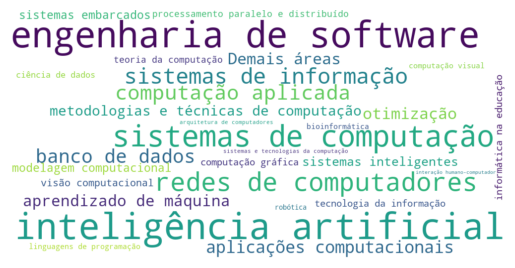

In [13]:
text = df_poscomp['especialidade'].value_counts()[:80]
text = text.to_dict()

stopwords = set(['o', 'a', 'e', 'é', 'de', 'da', 'do', 'para', ' e'])

wordcloud2 = WordCloud(background_color="white",
                       random_state=42, 
                       min_word_length=3,
                        width=1000, height=500,
                        stopwords=stopwords
                       ).generate_from_frequencies(text)
# WordCloud.generate_from_frequencies

plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
# plt.margins(x=0, y=0)
plt.savefig('../imagens/nuvem_palavras.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [14]:
# contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')
# contagem_areas = contagem_areas.sort_values(['ESTADO', 'CONTAGEM'], ascending=[True, False])
# areas_mais_frequentes = contagem_areas.groupby('ESTADO').first().reset_index()
# print(areas_mais_frequentes)

In [15]:
# df.to_csv('db_poscomp.csv', index=False)

In [16]:
# Supondo que 'data_poscomp_esp' seja o seu DataFrame
qtd = df_poscomp.groupby(['especialidade', 'estado']).size().reset_index(name='counts')

In [17]:
# Encontre a especialidade predominante para cada estado
idx = qtd.groupby(['estado'])['counts'].transform(max) == qtd['counts']
result_df = qtd[idx]

In [18]:
result_df['estado'] = result_df['estado'].str.upper()

In [19]:
espec_translation = {
    "Demais áreas": "Other areas",
    "aplicações computacionais": "computing applications",
    "banco de dados": "database",
    "engenharia de software": "software engineering",
    "inteligência artificial": "artificial intelligence",
    "sistemas de computação": "computing systems",
    "sistemas de informação": "information systems",
    "sistemas inteligentes": "intelligent systems",
    "tecnologia da informação": "information technology"
}


In [20]:
result_df['especialidade'].replace(espec_translation, inplace=True)

In [21]:
result_df

,especialidade,estado,counts
0,Other areas,AC,1
17,Other areas,RJ,88
26,computing applications,CE,196
82,database,AC,1
206,software engineering,AP,6
207,software engineering,BA,49
209,software engineering,DF,19
211,software engineering,GO,170
214,software engineering,MS,131
215,software engineering,MT,41


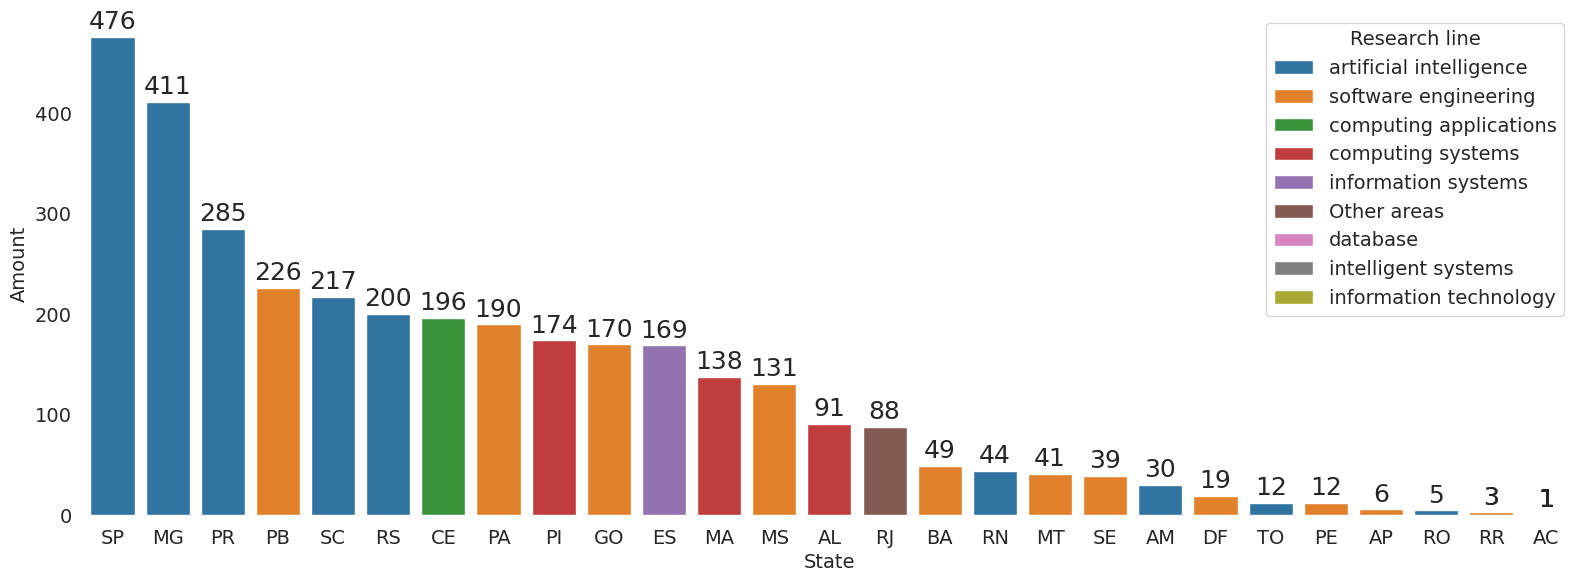

In [22]:
visualizacao.barplot_view(result_df.sort_values(['counts'], ascending=False), 
                          x='estado', y='counts', hue='especialidade', figsize=(16,6), dodge=False,
                         save_path='../imagens/especialidades_estados_english.pdf', title_legend='Research line', ylabel="Amount",
                         xlabel="State")

In [23]:
# Supondo que 'data_poscomp_esp' seja o seu DataFrame
qtd_sexo = df_poscomp.groupby(['especialidade', 'sexo']).size().reset_index(name='counts')

In [24]:
qtd_sexo.head()

,especialidade,sexo,counts
0,Demais áreas,feminino,67
1,Demais áreas,masculino,328
2,aplicações computacionais,feminino,57
3,aplicações computacionais,masculino,381
4,aprendizado de máquina,feminino,52


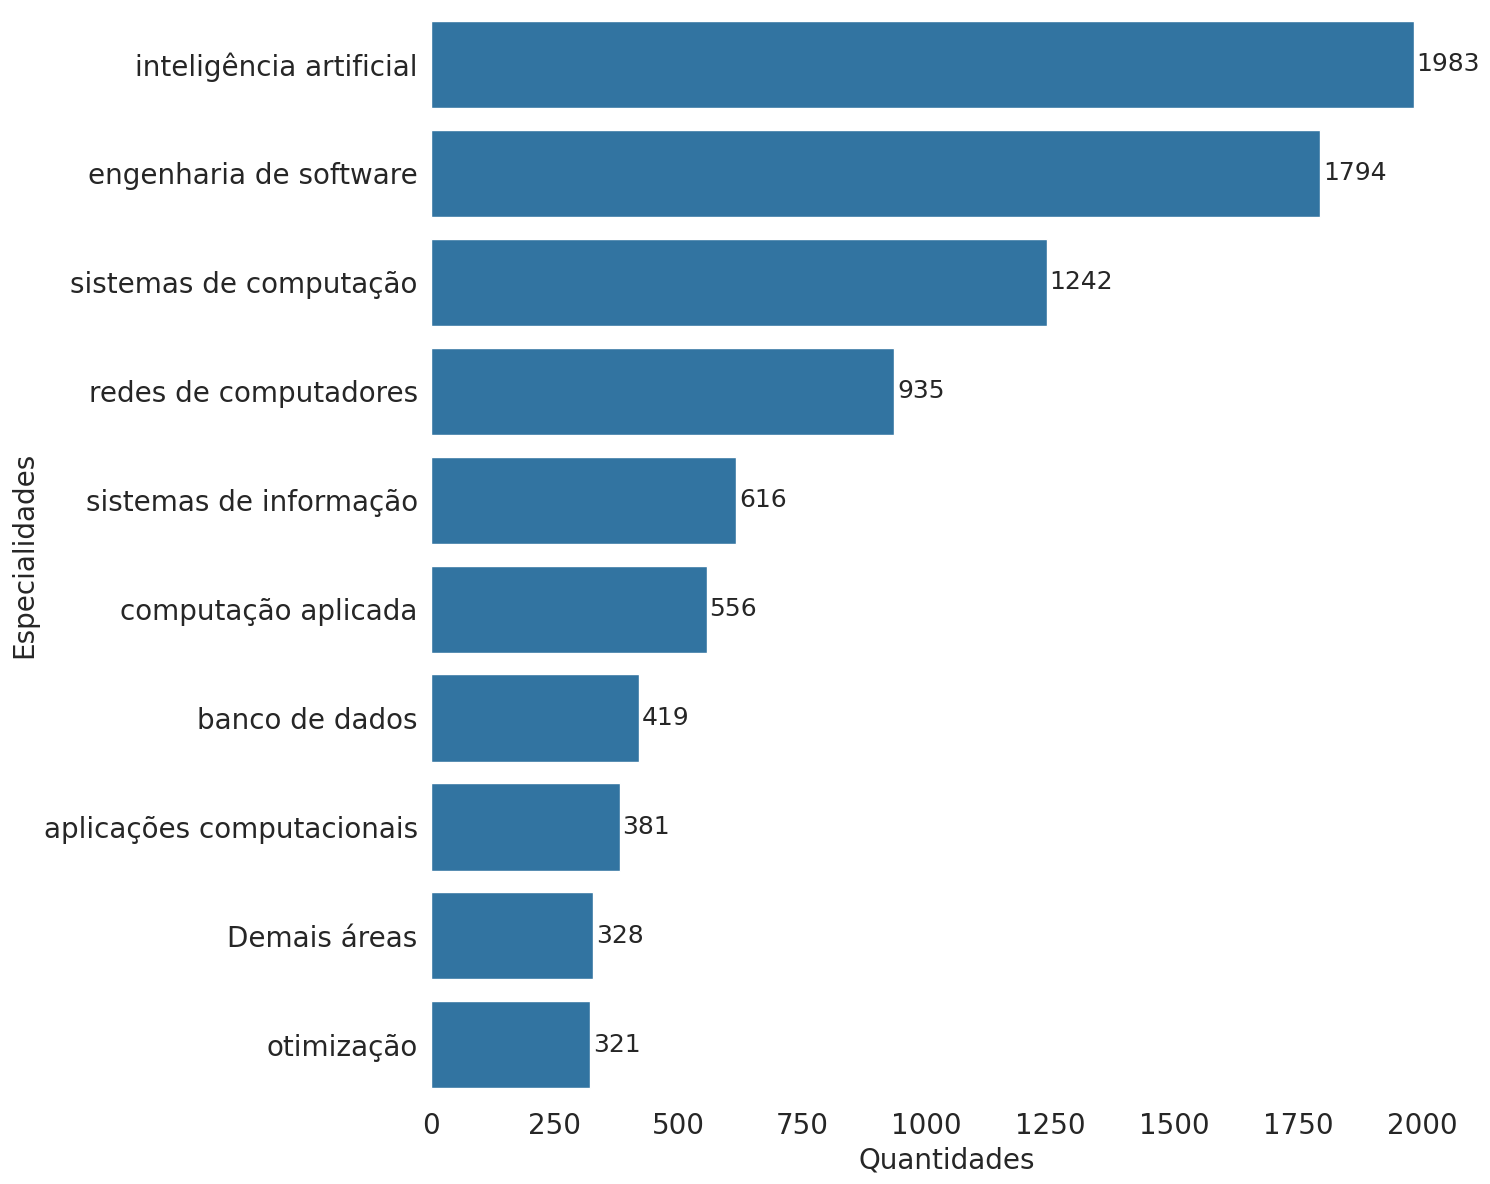

In [25]:
masculino = qtd_sexo[qtd_sexo['sexo'] == 'masculino']
# Reorder this data frame
masculino = masculino.sort_values(['counts'], ascending=False).reset_index(drop=True)[:10]
visualizacao.barplot_view(masculino.sort_values(['counts'], ascending=False), 
                          y='especialidade', x='counts', figsize=(15,12),
                         save_path='../imagens/especialidades_masculino.pdf', ylabel="Especialidades",
                         xlabel="Quantidades", show_legend=False, fontsize=20)

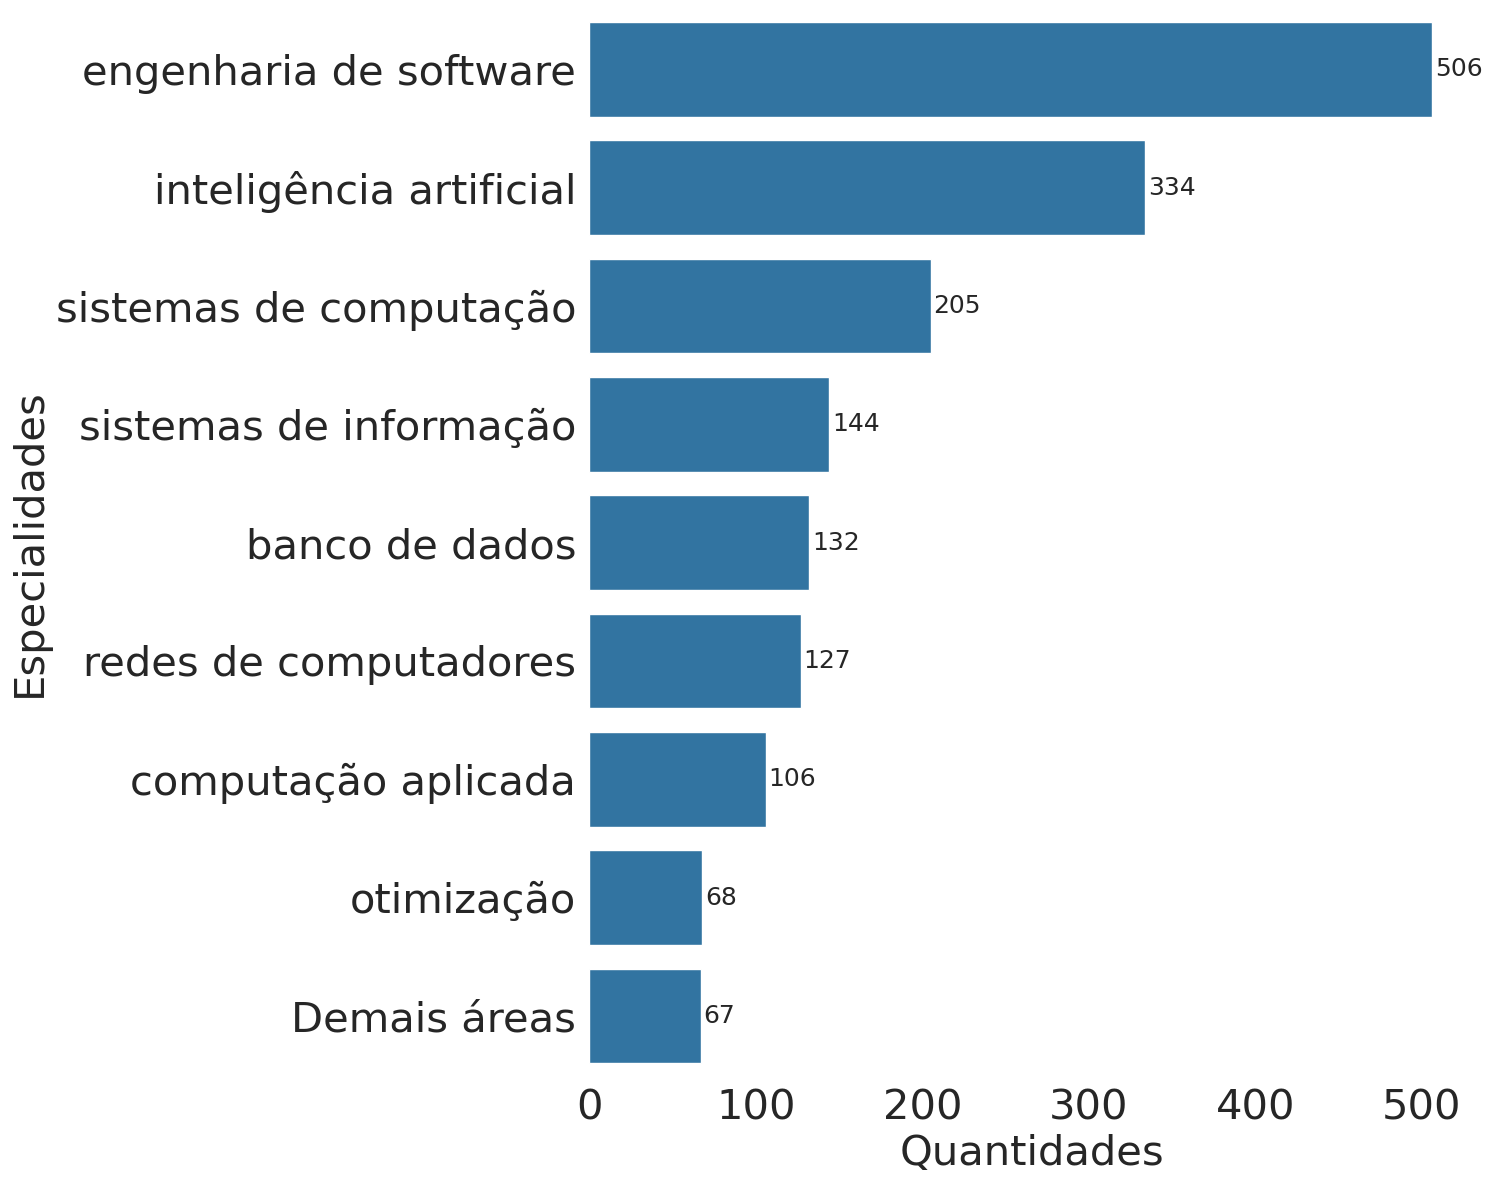

In [26]:
feminino = qtd_sexo[qtd_sexo['sexo'] == 'feminino']
feminino = feminino.sort_values(['counts'], ascending=False).reset_index(drop=True)[:9]
visualizacao.barplot_view(feminino.sort_values(['counts'], ascending=False), 
                          y='especialidade', x='counts', figsize=(15,12),
                         save_path='../imagens/especialidades_feminina.pdf', ylabel="Especialidades",
                         xlabel="Quantidades", show_legend=False, fontsize=30)

In [27]:
# Encontre a especialidade predominante para cada estado
idx_sexo = qtd_sexo.groupby(['sexo'])['counts'].transform(max) == qtd_sexo['counts']
result_df_sexo = qtd_sexo[idx_sexo]

In [28]:
result_df_sexo

,especialidade,sexo,counts
20,engenharia de software,feminino,506
25,inteligência artificial,masculino,1983


In [29]:
df_poscomp.to_csv('../dados/processed/dados_poscomp_completo_test.csv', index=False)